Import Library

In [ ]:
import pandas as pd #linear algebra
import numpy as np #data processing
import matplotlib.pyplot as plt #for plotting
from matplotlib import rcParams
import seaborn as sb #for better visualization of data

data=pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

Data Visualization

In [ ]:
data.head(10) #show part of data from top

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [ ]:
data.shape # show number of rows and column of datasets.

(1599, 12)

In [ ]:
data.describe() # generate descriptive statistics of a dataset

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
print(data.isnull().sum()) #check whether the data contain missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


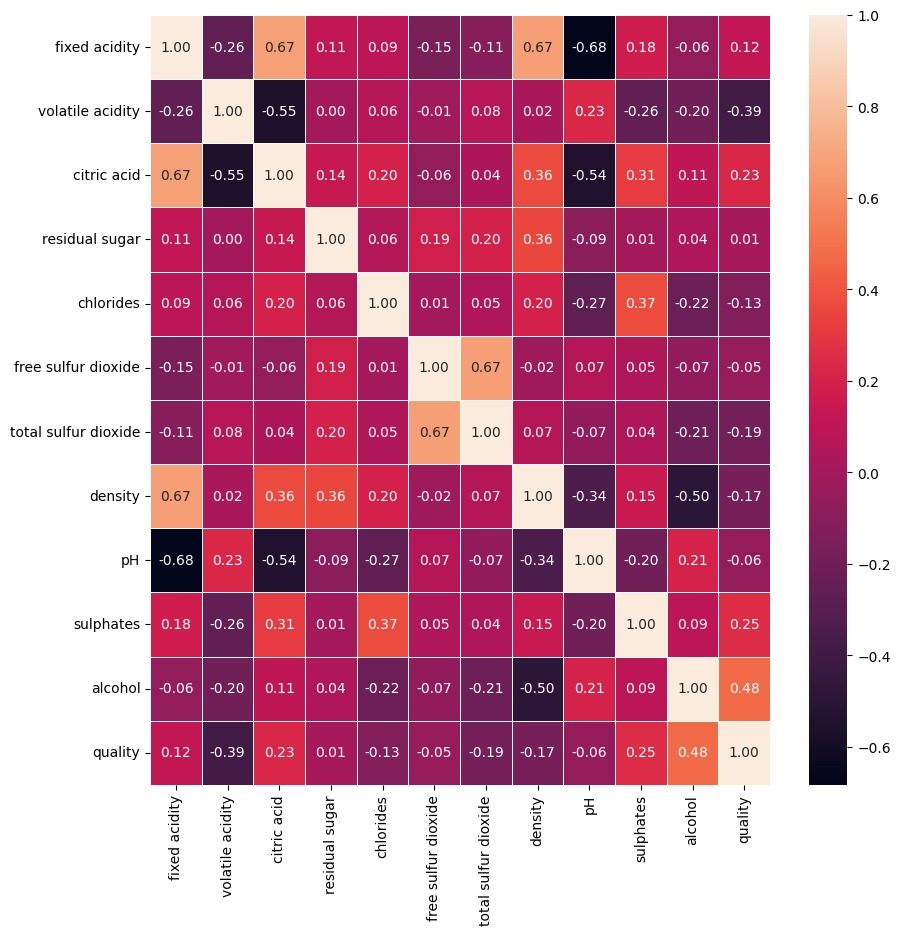

In [ ]:
# check the relationship between dependent and independent variables
#-1 means negative relationship between dependent and independent variables
# 0 means no relationship
# 1 means positve relationship
data.corr()
f, ax = plt.subplots(figsize = (10,10))
sb.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

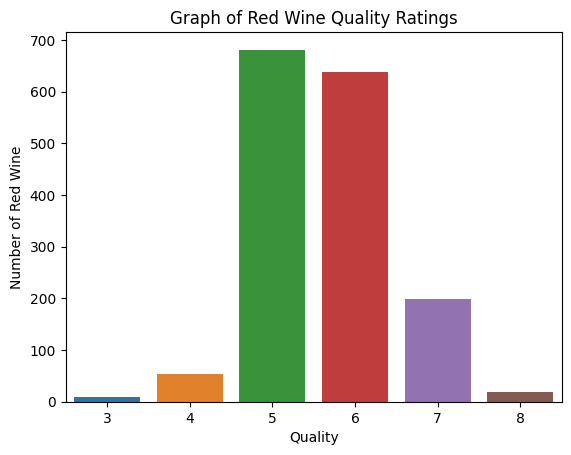

In [ ]:
sb.barplot(x=data['quality'].unique(), y=data['quality'].value_counts())
plt.xlabel("Quality")
plt.ylabel("Number of Red Wine")
plt.title("Graph of Red Wine Quality Ratings")
plt.show()

Data Preprocessing<br>
Perform class reduction to simplify problem and improve model performance::

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

**bins = (2, 6.5, 8)** defines the bin edges. Observations with quality values between 2 and 6.5 will be labeled as 'bad', and those between 6.5 and 8 will be labeled as 'good'.<br>

**group_names** = ['bad', 'good'] provides the labels for the two categories.<br>

**pd.cut(data['quality'], bins=bins, labels=group_names)** applies the binning to the 'quality' column of the DataFrame. The result is a new categorical variable 'quality' with values 'bad' or 'good' based on the specified bins and labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])

**LabelEncoder** is used to convert categorical labels into numerical format. It assigns a unique integer to each unique category in the 'quality' column.<br>

**label_quality.fit_transform(data['quality'])** fits the label encoder on the 'quality' column and then transforms the categorical labels into numerical labels. The transformed labels replace the original 'quality' column in the DataFrame.

In [ ]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
sb.barplot(x=data['quality'].unique(), y=data['quality'].value_counts())
plt.xlabel("Quality")
plt.ylabel("Number of Red Wine")
plt.title("Graph of Red Wine Quality Ratings")
plt.show()

In [ ]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [ ]:
from sklearn.model_selection import train_test_split # used to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

StandardScaler is a feature scaling which is used to bring all the features to the same scale, preventing some features from dominating others during model training.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Implementing Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       413
           1       0.65      0.39      0.49        67

    accuracy                           0.89       480
   macro avg       0.78      0.68      0.71       480
weighted avg       0.87      0.89      0.87       480



In [ ]:
print(confusion_matrix(y_test, pred_rf))

[[399  14]
 [ 41  26]]


Hyperparameter tuning using cross validation<br>
Cross-validation is a resampling technique used in machine learning to assess the performance of a model and to reduce the risk of overfitting. It involves splitting the dataset into multiple subsets, training the model on some of these subsets, and evaluating it on the remaining subsets.

In [ ]:
from sklearn.model_selection import cross_val_score
rf_eval = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

In the end, we use the average accuracy score get from cross validation as our model final accuracy score.

In [ ]:
rf_eval.mean()

0.9124517374517375